**Upload File Dataset** \
1. Telco-Customer-Churn.xlsx
2. model1.csv
3. model2.csv
4. model3.csv
5. model4.csv
6. model5.csv
7. model6.csv
8. model7.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model5.csv to model5.csv


# Persiapan Awal
> **Run semua cell di sini sebelum mulai coding** \


**Step-step:** \
Run Section Persiapan Awal --> Upload file dataset --> Manipulasi data (misal mau cleaning/nge-split data/dll --> Pilih data yang mau dipake buat model --> Apply model ke data --> Bikin csv/excel baru dari data yang diperoleh dari model --> Save csv/excel itu --> Masukin ke drive, supaya kalo mau run lagi tinggal upload filenya

## Package & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import io
import requests

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 4.3MB/s 
     |████████████████████████████████| 22.3MB 62.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# url = 'https://raw.githubusercontent.com/aryap-putra/datasciencecoursera/master/Telco-Customer-Churn%20(1).csv'
# df = pd.read_csv(url, sep=';')
df = pd.read_excel('/content/Telco-Customer-Churn.xlsx')
df.head(10)

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65       820.50    Yes
6  1452-KIOVK    Male              0  ...          89.10      1949.40     No
7  6713-OKOMC  Female              0  ...          29.75       301.90     No
8  7892-POOKP  Female              0  ...         104.80      3046.05    Yes
9  6388-TABGU    Male              0  ...          56.15      3487.95     No

[10 rows x 21 columns]

## Informasi tentang Dataset

In [ ]:
  # panjang data
len(df)

7043

In [ ]:
  # kolom-kolom pada dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
  # apakah ada nilai yang kosong pada dataset?
  # True jika ada, False jika tidak
df.isnull().values.any()

True

In [ ]:
  # di mana letak data yang kosong dan berapa banyak?
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Fungsi-fungsi

### Plotting

In [ ]:
def scatter(data, var_x, var_y):
    # Scatter plot

    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.scatter(data[var_x], data[var_y], marker='+', color='red')
    plt.figure()
# ------------------------------------------------------------------------------

### Model Menghitung Churn Rate

In [ ]:
def churn_model1(data, categ_var, customer_idx):
    '''
    Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar sum, makin mungkin Churn
        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        sum: Churn rate ([count]/[total])
    '''

    sum = 0
    for var in categ_var:
        cv = data[var][customer_idx]  # value variabel var dari customer ke-customer_idx
        total = data[var].value_counts()[cv]  # banyak customer dengan value cv di variabel var
        count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')]) # banyak customer dengan value cv di variabel var dan Churn-nya 'Yes'
        sum += count/total

    return sum
# ------------------------------------------------------------------------------

def churn_model2(data, categ_var, customer_idx):
    '''
    [Bedanya sama churn_model1 cuma hasil ratenya dikali, bukan ditambah]
    [Harusnya lebih masuk akal dari model1 karena sesuai sama konsep peluang]

    Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar product, makin mungkin Churn
        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        product: Churn rate ([count]/[total])
    '''

    product = 1
    for var in categ_var:
        cv = data[var][customer_idx]  # value variabel var dari customer ke-customer_idx
        total = data[var].value_counts()[cv]  # banyak customer dengan value cv di variabel var
        count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')]) # banyak customer dengan value cv di variabel var dan Churn-nya 'Yes'
        product *= count/total

    return product
# ------------------------------------------------------------------------------

def churn_model3(data, categ_var, customer_idx):
    '''
    [Dari model2 diperbaiki, pakai konsep Naive Bayes]

    Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar hasil, makin mungkin Churn
        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        hasil: Churn rate ([count]/[total])

    '''

    prod = 1
    prod_no = 1
    for var in categ_var:
        cv = data[var][customer_idx]
        # total = data[var].value_counts()[cv]
        count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')])
        count_no = len(data.loc[(data[var] == cv) & (data['Churn'] == 'No')])
        prod *= count / len(data.loc[data['Churn']=='Yes'])
        prod_no *= count_no / len(data.loc[data['Churn']=='No'])

    atas = prod * (len(data.loc[data['Churn']=='Yes'])/(len(data)))
    bawah = prod_no * (len(data.loc[data['Churn']=='No'])/(len(data)))
    hasil = atas / (atas + bawah)

    return hasil
# ------------------------------------------------------------------------------

def churn_model4(data, categ_var, customer_idx):
    '''
    [Dari model2 diperbaiki, pakai konsep Naive Bayes]

    Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar hasil, makin mungkin Churn
        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        hasil: Churn rate ([count]/[total])

    '''

    prod = 1
    prod_no = 1
    for var in categ_var:
        cv = data[var][customer_idx]
        # total = data[var].value_counts()[cv]
        count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')])
        count_no = len(data.loc[(data[var] == cv) & (data['Churn'] == 'No')])
        prod *= count / len(data.loc[data['Churn']=='Yes'])
        prod_no *= count_no / len(data.loc[data['Churn']=='No'])

    mean = np.mean(data[data.Churn == 'Yes'])['tenure']
    std = np.std(data[data.Churn == 'Yes'])['tenure']
    mean_no = np.mean(data[data.Churn == 'No'])['tenure']
    std_no = np.std(data[data.Churn == 'No'])['tenure']

    pangkat_e = -((data.tenure[customer_idx] - mean)**2)/(2*(std**2))
    pangkat_e_no = -((data.tenure[customer_idx] - mean_no)**2)/(2*(std_no**2))
    prod *= (1/(np.sqrt(2*np.pi)*std))*(np.e**pangkat_e)
    prod_no *= (1/(np.sqrt(2*np.pi)*std_no))*(np.e**pangkat_e)

    atas = prod * (len(data.loc[data['Churn']=='Yes'])/(len(data)))
    bawah = prod_no * (len(data.loc[data['Churn']=='No'])/(len(data)))
    hasil = atas / (atas + bawah)

    return hasil
# ------------------------------------------------------------------------------

def churn_model5(data, categ_var0, categ_var1, customer_idx):
    '''
    [Dari model2 diperbaiki, pakai konsep Naive Bayes,
    perhitungan antara yang make InternetService sama yang ngga dipisah]

    Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar hasil, makin mungkin Churn
        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        hasil: Churn rate ([count]/[total])

    '''
    prod = 1
    prod_no = 1
    if data['InternetService'][customer_idx] == 'No':
      # untuk pelanggan yang ga pake InternetService
      for var in categ_var1:
          cv = data[var][customer_idx]
          # total = data[var].value_counts()[cv]
          count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')])
          count_no = len(data.loc[(data[var] == cv) & (data['Churn'] == 'No')])
          prod *= count / len(data.loc[data['Churn']=='Yes'])
          prod_no *= count_no / len(data.loc[data['Churn']=='No'])
    elif data['InternetService'][customer_idx] == ('DSL' or 'Fiber optic'):
      # untuk pelanggan yang pake InternetService
      for var in categ_var0:
          cv = data[var][customer_idx]
          # total = data[var].value_counts()[cv]
          count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')])
          count_no = len(data.loc[(data[var] == cv) & (data['Churn'] == 'No')])
          prod *= count / len(data.loc[data['Churn']=='Yes'])
          prod_no *= count_no / len(data.loc[data['Churn']=='No'])

    atas = prod * (len(data.loc[data['Churn']=='Yes'])/(len(data)))
    bawah = prod_no * (len(data.loc[data['Churn']=='No'])/(len(data)))
    hasil = atas / (atas + bawah)

    return hasil
# ------------------------------------------------------------------------------

In [ ]:
# mean = np.mean(data[data.Churn == 'Yes'])['tenure']
# std = np.std(data[data.Churn == 'Yes'])['tenure']
# mean_no = np.mean(data[data.Churn == 'No'])['tenure']
# std_no = np.std(data[data.Churn == 'No'])['tenure']

# pangkat_e = -((data.tenure[0] - mean)**2)/(2*(std**2))
# prod = (1/(np.sqrt(2*np.pi)*std))*(np.e**pangkat_e)
# prod

### Model Menghitung Customer Value

In [ ]:
def value_model1(data, customer_idx):
  '''
  Sesimpel ngaliin tenure sama MonthlyCharges

  '''
  return data.tenure[customer_idx]*data.MonthlyCharges[customer_idx]
# ------------------------------------------------------------------------------
def value_model2(data, customer_idx):
    max_charge = data['TotalCharges'].max()
    max_tenure = data['tenure'].max()
    return 0.5*data.TotalCharges[customer_idx]/max_charge + 0.5*data.tenure[customer_idx]/max_tenure


def value_model3(data, customer_idx):
    max_charge = data['MonthlyCharges'].max()
    min_charge = data['MonthlyCharges'].min()
    max_tenure = data['tenure'].max()
    return 0.5 * ((data.MonthlyCharges[customer_idx] - min_charge) / (max_charge - min_charge) + (data.tenure[customer_idx]/max_tenure))


def value_model4(data, charge, customer_idx):
    max_charge = max(charge)
    min_charge = min(charge)
    max_tenure = data['tenure'].max()

    if data.Contract[customer_idx] == 'One year':
        return 0.5 * ((data.MonthlyCharges[customer_idx] * 12 - min_charge) / (max_charge - min_charge) + (data.tenure[customer_idx] / max_tenure))
    elif data.Contract[customer_idx] == 'Two year':
        return 0.5 * ((data.MonthlyCharges[customer_idx] * 24 - min_charge) / (max_charge - min_charge) + (data.tenure[customer_idx] / max_tenure))
    elif data.Contract[customer_idx] == 'Month-to-month':
        return 0.5 * ((data.MonthlyCharges[customer_idx] - min_charge) / (max_charge - min_charge) + (data.tenure[customer_idx] / max_tenure))


Misal A
tenure = 50
TC = 1000

Misal B
tenure 25
TC = 1500

model1
value A ~ 1000
value B ~ 1500

Misal max(tenure) = 100, max(TC) = 3000
model 2
value A = 50/100 + 1000/3000 = 0.83333
value B = 25/100 + 1500/3000 = 0.75

### Model 1-Dimensi (Value & Churn Digabung)

In [ ]:
def gabung_model1(data, categ_var, customer_idx):
    '''
    [Mempertimbangkan keadilan antara customer yang berlangganan sudah lama,
    dengan TotalCharges rendah dengan customer yang mungkin belum lama
    berlangganan tetapi TotalCharges-nya tinggi (atau bahkan jauh lebih tinggi
    dibanding customer sebelumnya)]

    > Pakai variabel kategorikal di categ_var untuk memprediksi Churn rate
    Makin besar hasil, makin mungkin Churn
    > Pakai model value = tenor x MonthlyCharges
    Makin besar value, makin

        data = dataFrame yang digunakan
        categ_var: variabel kategorikal
        customer_idx: indeks customer (int)
        var: variabel2 di [categ_var]
        cv: value dari variabel [var] dari customer ke-[customer_idx]
        total: banyak customer dengan value [cv] di variabel [var]
        count: banyak customer dengan value [cv] di variabel [var] dan Churn-nya yes
        hasil: Churn rate ([count]/[total])

    '''

    prod = 1
    prod_no = 1
    for var in categ_var:
        cv = data[var][customer_idx]
        # total = data[var].value_counts()[cv]
        count = len(data.loc[(data[var] == cv) & (data['Churn'] == 'Yes')])
        count_no = len(data.loc[(data[var] == cv) & (data['Churn'] == 'No')])
        prod *= count / len(data.loc[data['Churn']=='Yes'])
        prod_no *= count_no / len(data.loc[data['Churn']=='No'])

    atas = prod * (len(data.loc[data['Churn']=='Yes'])/(len(data)))
    bawah = prod_no * (len(data.loc[data['Churn']=='No'])/(len(data)))
    hasil = atas / (atas + bawah)

    return hasil
# ------------------------------------------------------------------------------

# Analisis Data / *Exploratory Data Analysis* (EDA)

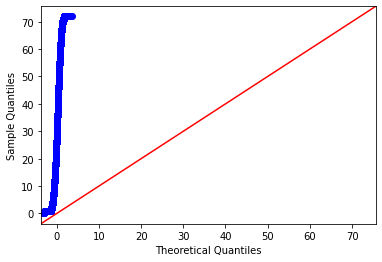

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

# my_data = df1.TotalCharges - (df1.MonthlyCharges*df.tenure)
my_data = df1.tenure
sm.qqplot(my_data, line='45')
pylab.show()

(array([2979.,  313.,  192.,  194.,  169.,  244.,  206.,  313.,  495.,
        1938.]),
 array([5.59189791e-08, 9.97813593e-02, 1.99562663e-01, 2.99343966e-01,
        3.99125269e-01, 4.98906573e-01, 5.98687876e-01, 6.98469179e-01,
        7.98250483e-01, 8.98031786e-01, 9.97813089e-01]),
 <a list of 10 Patch objects>)

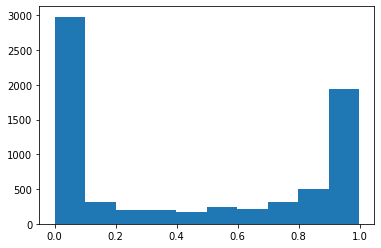

In [ ]:
plt.hist(model5['model5_churn_score'])
# model5.head()

In [ ]:
df[df['InternetService'] == 'No'].tenure.describe()

count    1526.000000
mean       30.547182
std        24.356507
min         0.000000
25%         8.000000
50%        25.000000
75%        52.750000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
df[(df['InternetService'] == 'DSL') | (df['InternetService'] == 'Fiber optic')].tenure.describe()

count    5517.000000
mean       32.875657
std        24.593647
min         0.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

# Manipulasi Dataset

## Cleaning Dataset

In [ ]:
# df1: data yang kosong diisi nol
df1 = df.copy()
df1.TotalCharges = df1.TotalCharges.replace(np.nan, 0).astype('float32')
len(df1)

7043

In [ ]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# df2: data yang kosong dihapus
df2 = df.copy()
df2 = df2.dropna()
len(df2)

7032

## Pemisahan Dataset

In [ ]:
# data customer yang pakai & tidak pakai InternetService dipisah

# Data

In [ ]:
# Isi terlebih dahulu data yang ingin digunakan
data = df1

# Apply Model
Jangan run satu section langsung, manual tiap model aja (kalau dibutuhkan) \
Isi terlebih dahulu data yang ingin digunakan

In [ ]:
# Isi terlebih dahulu data yang ingin digunakan
data = df1

## Model 1

In [ ]:
# model value: value_model1
# model churn: churn_model1
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'gender', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model1(data, i) for i in range(len(data))]
churn_score = [churn_model1(data, categ_var, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model1 = pd.DataFrame(result)

model1.to_csv (r'model1.csv', index = False)

In [ ]:
model1.head()

customer_value  churn_score
0           29.85     4.761878
1         1936.30     3.911436
2          107.70     4.380471
3         1903.50     3.603771
4          141.40     5.327123

## Model 2

In [ ]:
# model value: value_model1
# model churn: churn_model2
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'gender', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model1(data, i) for i in range(len(data))]
churn_score = [churn_model2(data, categ_var, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model2 = pd.DataFrame(result)

model2.to_csv (r'model2.csv', index = False)

In [ ]:
model2.head()

model2_customer_value  model2_churn_score
0                  29.85        1.836815e-08
1                1936.30        6.697208e-10
2                 107.70        4.891743e-09
3                1903.50        1.981759e-10
4                 141.40        1.358044e-07

## Model 3

In [ ]:
# model value: value_model1
# model churn: churn_model3
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'gender', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model1(data, i) for i in range(len(data))]
churn_score = [churn_model3(data, categ_var, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model3 = pd.DataFrame(result)

model3.to_csv (r'model3.csv', index = False)

In [ ]:
model3.head()

model3_customer_value  model3_churn_score  model3_customer_value_normalize
0                  29.85            0.908528                         0.003491
1                1936.30            0.097490                         0.226468
2                 107.70            0.599997                         0.012596
3                1903.50            0.020394                         0.222632
4                 141.40            0.993956                         0.016538

In [ ]:
model3.describe()

## Model 4

In [ ]:
# model value: value_model2
# model churn: churn_model3
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'gender', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model2(data, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': model3.model3_churn_score
          }

model4 = pd.DataFrame(result)

#model4.to_csv (r'model4.csv', index = False)

In [ ]:
model4.head()

customer_value  churn_score
0        0.017326     0.908528
1        0.689786     0.097490
2        0.040231     0.599997
3        0.836951     0.020394
4        0.045239     0.993956

In [ ]:
# model value: value_model4
# model churn: churn_model3
# variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model4(data, i) for i in range(len(data))]
churn_score = [churn_model3(data, categ_var, i) for i in range(len(data))]

## Model 5

In [ ]:
# model value: value_model3
# model churn: churn_model3

## Model 6 (Model 5 Kehapus)

In [ ]:
# model value: value_model4
# model churn: churn_model3
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
customer_value = [value_model4(data, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': model3.model3_churn_score
          }

model6 = pd.DataFrame(result)

model6.to_csv (r'model6.csv', index = False)

In [ ]:
model6.head(20)

customer_value   churn_score
0         0.008905  9.085277e-01
1         0.353489  9.749036e-02
2         0.020088  5.999968e-01
3         0.398831  2.039383e-02
4         0.023063  9.939565e-01
5         0.069843  9.846020e-01
6         0.165202  8.583119e-01
7         0.071387  5.596322e-01
8         0.209641  8.886335e-01
9         0.546238  3.256742e-02
10        0.095788  4.207485e-01
11        0.188118  2.797239e-07
12        0.612129  3.128715e-01
13        0.355280  8.648380e-01
14        0.188931  7.611919e-01
15        0.955855  1.034269e-03
16        0.401561  1.600990e-06
17        0.941983  2.192822e-02
18        0.075882  9.204762e-02
19        0.158425  9.626999e-01

## Model 7
Ada masalah di model churn, valuenya jadi mayoritas cuma 0 & 1

In [ ]:
# model value: value_model4
# model churn: churn_model4
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
charge = [0 for i in range(len(data))]
for i in range(len(data)):
    if data.Contract[i] == 'One year':
        charge[i] = data.MonthlyCharges[i] * 12
    elif data.Contract[i] == 'Two year':
        charge[i] = data.MonthlyCharges[i] * 24
    elif data.Contract[i] == 'Month-to-month':
        charge[i] = data.MonthlyCharges[i]

customer_value = [value_model4(data, charge, i) for i in range(len(data))]
churn_score = [churn_model4(data, categ_var, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model7 = pd.DataFrame(result)

model7.to_csv (r'model7.csv', index = False)

In [ ]:
model7.head(20)

## Model 8

In [ ]:
# model value: value_model2
# model churn: churn_model5
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var0 = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
categ_var1 = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn', 'InternetService',
                            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies'])
customer_value = [value_model2(data, i) for i in range(len(data))]
churn_score = [churn_model5(data, categ_var0, categ_var1, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model8 = pd.DataFrame(result)

model8.to_csv (r'model8.csv', index = False)

In [ ]:
model8.head()

customer_value  churn_score
0        0.008663      0.00000
1        0.344893      0.00000
2        0.020115      1.00000
3        0.418475      0.00000
4        0.022620      0.26537

## Model 9

In [ ]:
# model value: value_model3
# model churn: churn_model5
  # variabel kategorikal yang dipakai: semua, kecuali gender

categ_var0 = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn'])
categ_var1 = data.columns.drop(['customerID', 'tenure', 'MonthlyCharges',
                            'TotalCharges', 'Churn', 'InternetService',
                            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies'])
customer_value = [value_model3(data, i) for i in range(len(data))]
churn_score = [churn_model5(data, categ_var0, categ_var1, i) for i in range(len(data))]

In [ ]:
result = {
    'customer_value': customer_value,
    'churn_score': churn_score
          }

model9 = pd.DataFrame(result)

model9.to_csv(r'model9.csv', index = False)

In [ ]:
model9.head()

customer_value  churn_score
0        0.064656      0.00000
1        0.428648      0.00000
2        0.191003      1.00000
3        0.432152      0.00000
4        0.274834      0.26537

# Hasil Apply Model
Perbarui terus section ini kalau ada model baru

In [ ]:
model1 = pd.read_csv('model1.csv')
model2 = pd.read_csv('model2.csv')
model3 = pd.read_csv('model3.csv')
model4 = pd.read_csv('model4.csv')
model5 = pd.read_csv('model5.csv')
model6 = pd.read_csv('model6.csv')
# model 7 perlu diperbaiki
model8 = pd.read_csv('model8.csv')
# model9 = pd.read_csv('model9.csv') belum ada

model6.head(3)

customer_value  churn_score
0        0.008905     0.908528
1        0.353489     0.097490
2        0.020088     0.599997

In [ ]:
model_5_v2 = pd.read_csv('model5.csv')
model_5_v2.head()

customer_value  churn_score
0        0.064656     0.908528
1        0.428648     0.097490
2        0.191003     0.599997
3        0.432152     0.020394
4        0.274834     0.993956

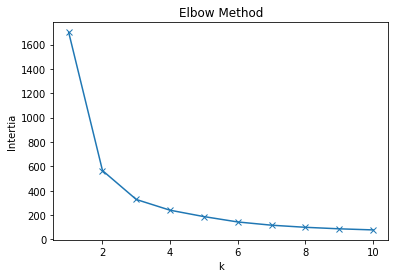

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(model_5_v2)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
model1 = model1.rename(columns={'customer_value': 'model1_customer_value', 'churn_score':'model1_churn_score'})
model2 = model2.rename(columns={'customer_value': 'model2_customer_value', 'churn_score':'model2_churn_score'})
model3 = model3.rename(columns={'customer_value': 'model3_customer_value', 'churn_score':'model3_churn_score'})
model4 = model4.rename(columns={'customer_value': 'model4_customer_value', 'churn_score':'model4_churn_score'})
model5 = model5.rename(columns={'customer_value': 'model5_customer_value', 'churn_score':'model5_churn_score'})
model6 = model6.rename(columns={'customer_value': 'model6_customer_value', 'churn_score':'model6_churn_score'})
# model 7
model8 = model8.rename(columns={'customer_value': 'model8_customer_value', 'churn_score':'model8_churn_score'})
# model9 = model9.rename(columns={'customer_value': 'model9_customer_value', 'churn_score':'model9_churn_score'})

In [ ]:
model3['model3_customer_value_normalize']=model3['model3_customer_value']/(model3['model3_customer_value'].max())

In [ ]:
model3.head()

model3_customer_value  model3_churn_score  model3_customer_value_normalize
0                  29.85            0.908528                         0.003491
1                1936.30            0.097490                         0.226468
2                 107.70            0.599997                         0.012596
3                1903.50            0.020394                         0.222632
4                 141.40            0.993956                         0.016538

In [ ]:
# merge data, model1, model2, model3
data = pd.concat([data, model1, model2, model3, model4, model5, model6, model8], axis=1)
data.head()

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663            0.00000
1  5575-GNVDE    Male  ...               0.344893            0.00000
2  3668-QPYBK    Male  ...               0.020115            1.00000
3  7795-CFOCW    Male  ...               0.418475            0.00000
4  9237-HQITU  Female  ...               0.022620            0.26537

[5 rows x 36 columns]

## Ambil data yang Customer yang Masih Ada (Churn = No)
data1 = model sampe model 8, cuma data pelanggan yang masih ada (Churn = No)

In [ ]:
# model1 = pd.read_csv('model1.csv')
# model2 = pd.read_csv('model2.csv')
# model3 = pd.read_csv('model3.csv')
# model4 = pd.read_csv('model4.csv')
# model5 = pd.read_csv('model5.csv')
# model6 = pd.read_csv('model6.csv')
# # model 7 perlu diperbaiki
# model8 = pd.read_csv('model8.csv')
# # model9 = pd.read_csv('model9.csv') belum ada

# model6.head(3)

In [ ]:
data1 = data[data['Churn'] == 'No']
data1 = data1.reset_index(drop=True)
data1.to_csv(r'data1.csv', index = False)

In [ ]:
data1

customerID  gender  ...  model8_customer_value model8_churn_score
0     7590-VHVEG  Female  ...               0.008663            0.00000
1     5575-GNVDE    Male  ...               0.344893            0.00000
2     7795-CFOCW    Male  ...               0.418475            0.00000
3     1452-KIOVK    Male  ...               0.265008            0.26537
4     6713-OKOMC  Female  ...               0.086825            0.00000
...          ...     ...  ...                    ...                ...
5169  2569-WGERO  Female  ...               0.581717            0.00000
5170  6840-RESVB    Male  ...               0.281263            0.00000
5171  2234-XADUH  Female  ...               0.923896            0.26537
5172  4801-JZAZL  Female  ...               0.096335            0.00000
5173  3186-AJIEK    Male  ...               0.852384            0.26537

[5174 rows x 36 columns]

# Playground

## Plot Churn - Value

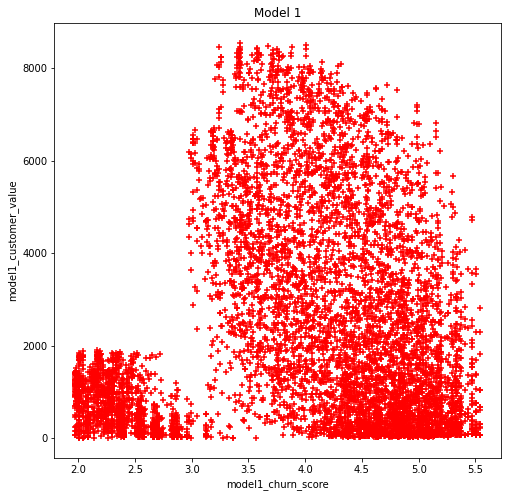

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Model 1')
scatter(data, 'model1_churn_score', 'model1_customer_value')

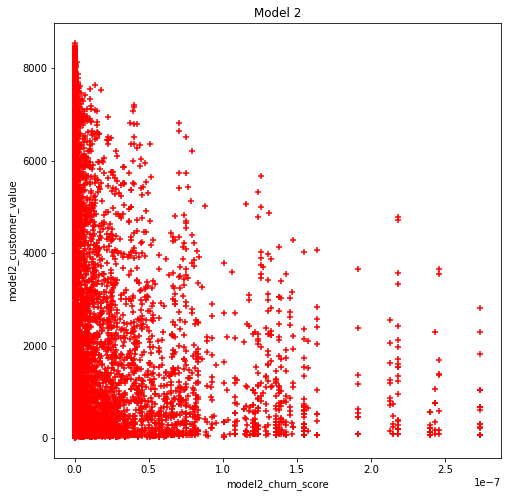

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Model 2')
scatter(data, 'model2_churn_score', 'model2_customer_value')

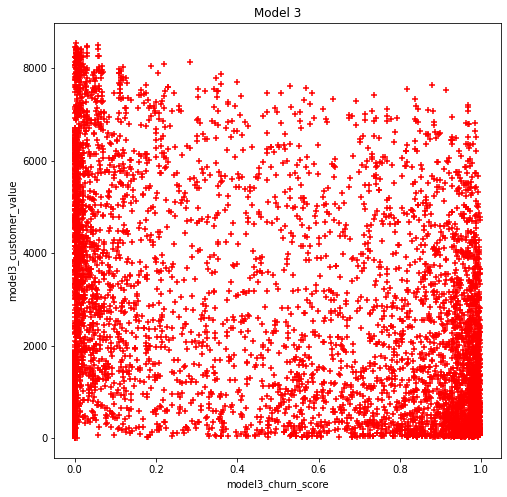

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Model 3')
scatter(data, 'model3_churn_score', 'model3_customer_value')

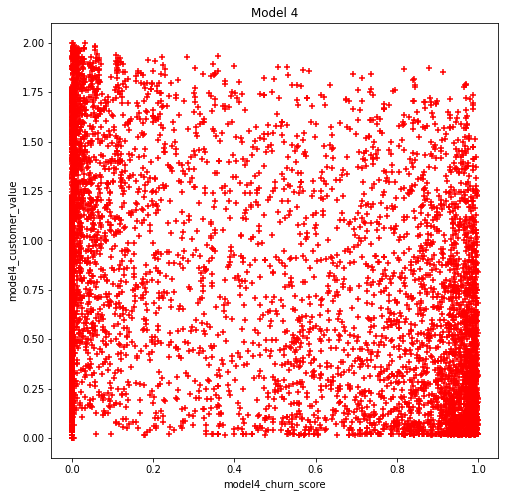

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Model 4')
scatter(data, 'model4_churn_score', 'model4_customer_value')

### Pake data pelanggan yang masih ada (Churn = No)

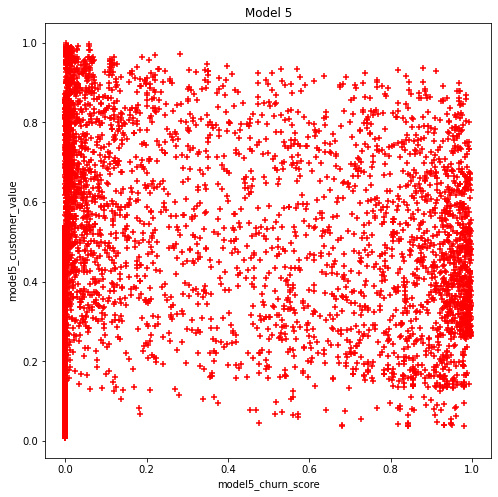

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Model 5')
scatter(data1, 'model5_churn_score', 'model5_customer_value')

# Clustering

## K-Means
data1 -> data pelanggan yang masih ada aja

### Model 1

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model1_customer_value'])
vmax = np.max(data1['model1_customer_value'])
cmin = np.min(data1['model1_churn_score'])
cmax = np.max(data1['model1_churn_score'])

for i in range(len(data1)):
  data1['model1_customer_value'][i] = (data1['model1_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model1_churn_score'][i] = (data1['model1_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model1_churn_score","model1_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 1, 1, ..., 2, 3, 2], dtype=int32)

In [ ]:
y_km22 = {'model1_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model1_kluster_kmeans
0                      3
1                      1
2                      1
3                      3
4                      3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model1_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     3
1  5575-GNVDE    Male  ...             0.00000                     1
2  7795-CFOCW    Male  ...             0.00000                     1
3  1452-KIOVK    Male  ...             0.26537                     3
4  6713-OKOMC  Female  ...             0.00000                     3

[5 rows x 37 columns]

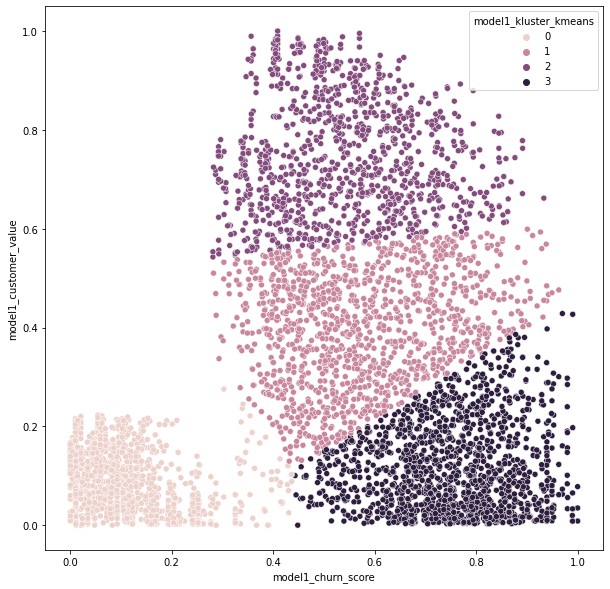

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model1_churn_score', y='model1_customer_value', hue = 'model1_kluster_kmeans')

### Model 2

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model2_customer_value'])
vmax = np.max(data1['model2_customer_value'])
cmin = np.min(data1['model2_churn_score'])
cmax = np.max(data1['model2_churn_score'])

for i in range(len(data1)):
  data1['model2_customer_value'][i] = (data1['model2_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model2_churn_score'][i] = (data1['model2_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 2
X22 = data1[["model2_churn_score","model2_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
y_km22 = {'model2_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model2_kluster_kmeans
0                      0
1                      0
2                      0
3                      0
4                      0

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model2_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     0
1  5575-GNVDE    Male  ...             0.00000                     0
2  7795-CFOCW    Male  ...             0.00000                     0
3  1452-KIOVK    Male  ...             0.26537                     0
4  6713-OKOMC  Female  ...             0.00000                     0

[5 rows x 37 columns]

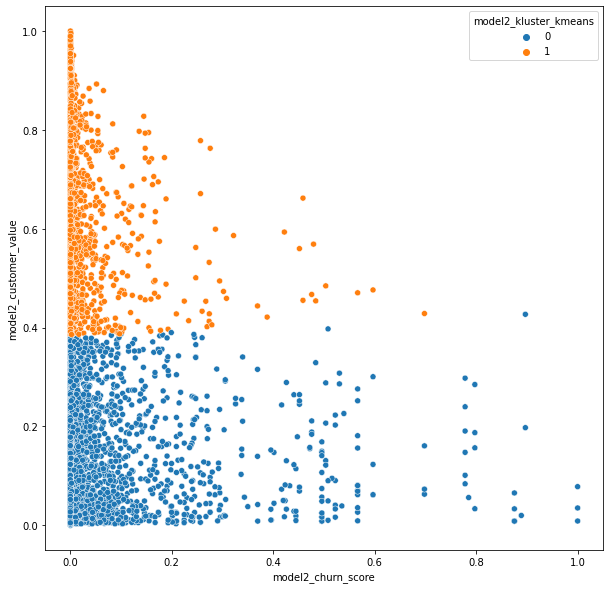

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model2_churn_score', y='model2_customer_value', hue = 'model2_kluster_kmeans')

### Model 3

In [ ]:
banyak_cluster = 4
X22 = model3[["model3_churn_score","model3_customer_value_normalize"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([0, 1, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
y_km22 = {'model3_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model3_kluster_kmeans
0                      0
1                      1
2                      0
3                      1
4                      0

In [ ]:
cluster = pd.concat([model3, y_km22], axis=1)
cluster.head()

model3_customer_value  ...  model3_kluster_kmeans
0                  29.85  ...                      0
1                1936.30  ...                      1
2                 107.70  ...                      0
3                1903.50  ...                      1
4                 141.40  ...                      0

[5 rows x 4 columns]

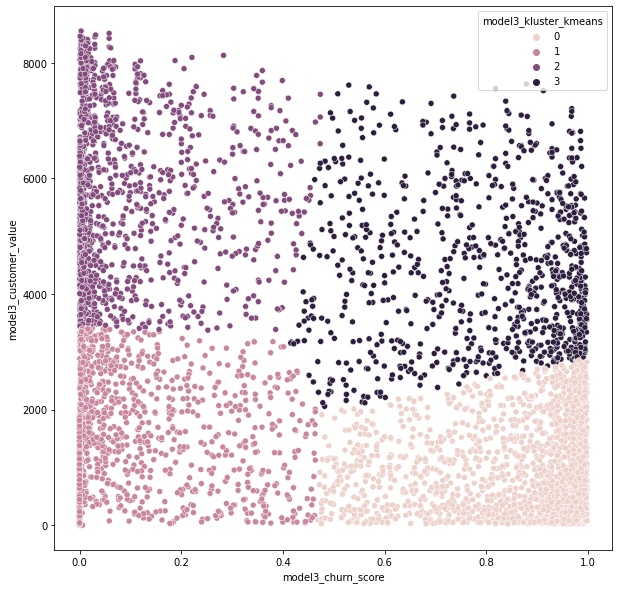

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model3_churn_score', y='model3_customer_value', hue = 'model3_kluster_kmeans')

### Model 4

In [ ]:
banyak_cluster = 4
X22 = model4[["model4_churn_score","model4_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

NameError: ignored

In [ ]:
y_km22

model5_kluster_kmeans
0                         1
1                         2
2                         2
3                         1
4                         1
...                     ...
5169                      0
5170                      0
5171                      0
5172                      1
5173                      0

[5174 rows x 1 columns]

In [ ]:
y_km22 = {'model4_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

KeyError: ignored

In [ ]:
cluster = pd.concat([model4, y_km22], axis=1)
cluster.head()

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model4_churn_score', y='model4_customer_value', hue = 'model4_kluster_kmeans')

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model4_kluster_kmeans'] == 3]),
len(cluster[cluster['model4_kluster_kmeans'] == 1]),
len(cluster[cluster['model4_kluster_kmeans'] == 2]),
len(cluster[cluster['model4_kluster_kmeans'] == 0])))

In [ ]:
# # ekstrak data

# for i in range(len(cluster)):
#   if cluster.model5_kluster_kmeans[i] == 3:
#     cluster.model5_kluster_kmeans[i] = 1
#   elif cluster.model5_kluster_kmeans[i] == 0:
#     cluster.model5_kluster_kmeans[i] = 2
#   elif cluster.model5_kluster_kmeans[i] == 2:
#     cluster.model5_kluster_kmeans[i] = 3
#   else:
#     cluster.model5_kluster_kmeans[i] = 4

# cluster.head()

### Model 5 *
Untuk sekarang yang paling baik

In [ ]:
banyak_cluster = 4
X22 = model5[["model5_churn_score","model5_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 2, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
y_km22 = {'model5_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model5_kluster_kmeans
0                      3
1                      2
2                      3
3                      2
4                      3

In [ ]:
cluster = pd.concat([model5, y_km22], axis=1)
cluster.head()

model5_customer_value  model5_churn_score  model5_kluster_kmeans
0               0.064656            0.908528                      3
1               0.428648            0.097490                      2
2               0.191003            0.599997                      3
3               0.432152            0.020394                      2
4               0.274834            0.993956                      3

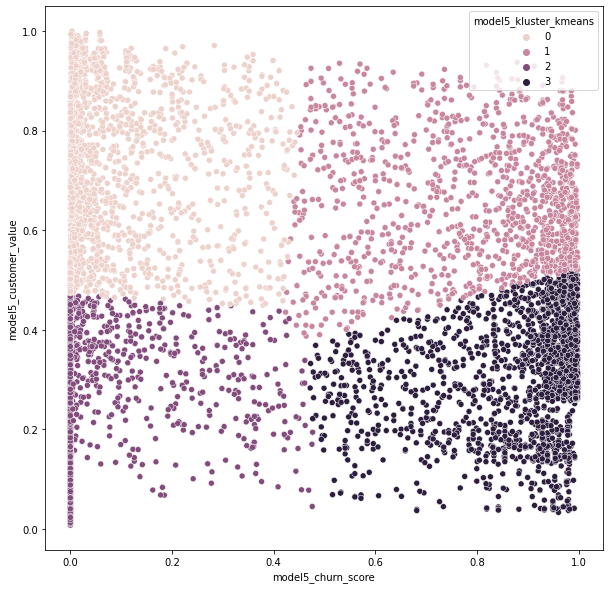

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model5_churn_score', y='model5_customer_value', hue = 'model5_kluster_kmeans')

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model5_kluster_kmeans'] == 1]),
len(cluster[cluster['model5_kluster_kmeans'] == 0]),
len(cluster[cluster['model5_kluster_kmeans'] == 2]),
len(cluster[cluster['model5_kluster_kmeans'] == 3])))

kuadran 1: 1188
kuadran 2: 1946
kuadran 3: 1808
kuadran 4: 2101


### Model 6 *
Untuk sekarang yang kedua paling baik

In [ ]:
banyak_cluster = 4
X22 = model6[["model6_churn_score","model6_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([2, 3, 0, ..., 2, 2, 1], dtype=int32)

In [ ]:
y_km22 = {'model6_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model6_kluster_kmeans
0                      2
1                      3
2                      0
3                      3
4                      2

In [ ]:
cluster = pd.concat([model6, y_km22], axis=1)
cluster.head()

model6_customer_value  model6_churn_score  model6_kluster_kmeans
0               0.008905            0.908528                      2
1               0.353489            0.097490                      3
2               0.020088            0.599997                      0
3               0.398831            0.020394                      3
4               0.023063            0.993956                      2

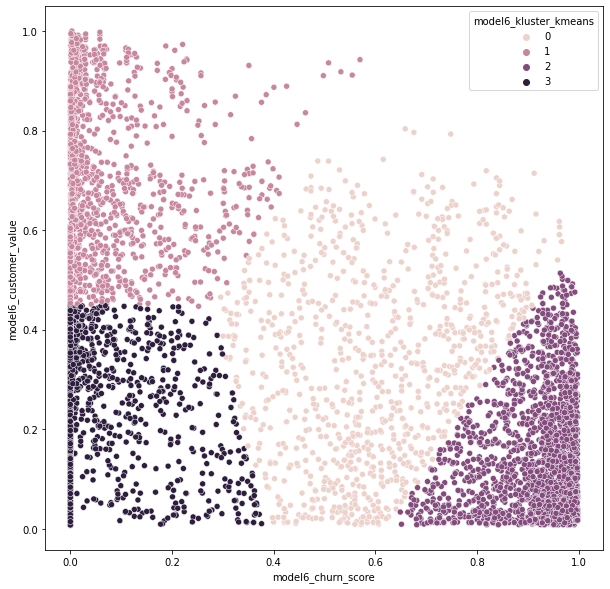

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model6_churn_score', y='model6_customer_value', hue = 'model6_kluster_kmeans')

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model6_kluster_kmeans'] == 1]),
len(cluster[cluster['model6_kluster_kmeans'] == 0]),
len(cluster[cluster['model6_kluster_kmeans'] == 2]),
len(cluster[cluster['model6_kluster_kmeans'] == 3])))

kuadran 1: 1821
kuadran 2: 937
kuadran 3: 2503
kuadran 4: 1782


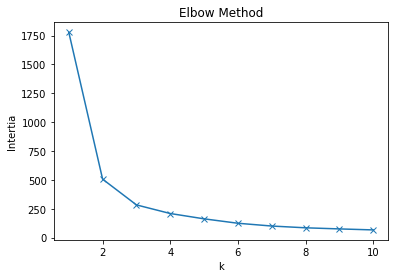

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

### Model 8

In [ ]:
banyak_cluster = 4
X22 = model8[["model8_churn_score","model8_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 1, 2, ..., 3, 3, 0], dtype=int32)

In [ ]:
y_km22 = {'model8_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model8_kluster_kmeans
0                      3
1                      1
2                      2
3                      1
4                      3

In [ ]:
cluster = pd.concat([model8, y_km22], axis=1)
cluster.head()

model8_customer_value  model8_churn_score  model8_kluster_kmeans
0               0.008663             0.00000                      3
1               0.344893             0.00000                      1
2               0.020115             1.00000                      2
3               0.418475             0.00000                      1
4               0.022620             0.26537                      3

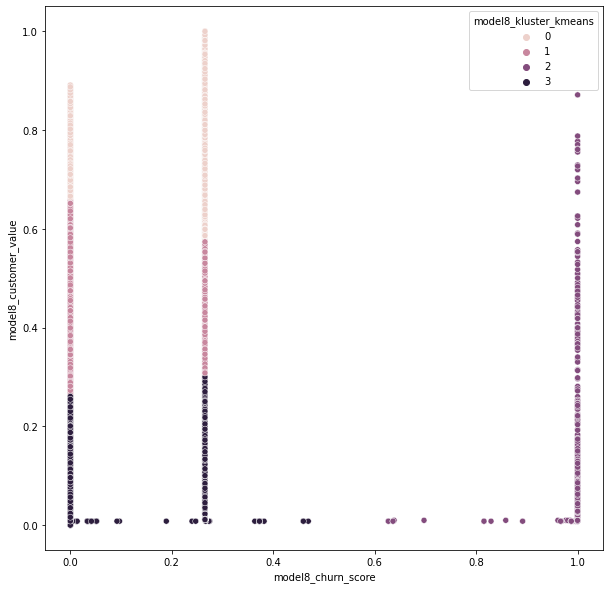

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model8_churn_score', y='model8_customer_value', hue = 'model8_kluster_kmeans')

In [ ]:
# print('''kuadran 1: {}
# kuadran 2: {}
# kuadran 3: {}
# kuadran 4: {}'''.format(
# len(cluster[cluster['model6_kluster_kmeans'] == 1]),
# len(cluster[cluster['model6_kluster_kmeans'] == 0]),
# len(cluster[cluster['model6_kluster_kmeans'] == 2]),
# len(cluster[cluster['model6_kluster_kmeans'] == 3])))

### Model 9

In [ ]:
banyak_cluster = 4
X22 = model9[["model9_churn_score","model9_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([2, 1, 0, ..., 2, 1, 3], dtype=int32)

In [ ]:
y_km22 = {'model9_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model9_kluster_kmeans
0                      2
1                      1
2                      0
3                      1
4                      1

In [ ]:
cluster = pd.concat([model9, y_km22], axis=1)
cluster.head()

model9_customer_value  model9_churn_score  model9_kluster_kmeans
0               0.064656             0.00000                      2
1               0.428648             0.00000                      1
2               0.191003             1.00000                      0
3               0.432152             0.00000                      1
4               0.274834             0.26537                      1

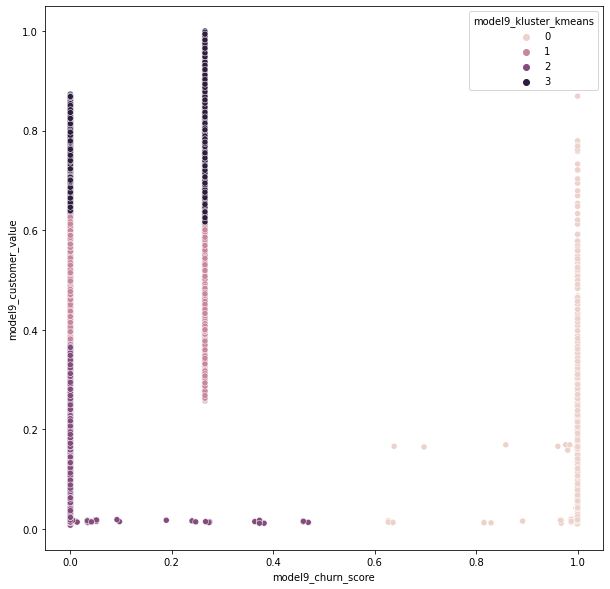

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model9_churn_score', y='model9_customer_value', hue = 'model9_kluster_kmeans')

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model9_kluster_kmeans'] == 1]),
len(cluster[cluster['model9_kluster_kmeans'] == 0]),
len(cluster[cluster['model9_kluster_kmeans'] == 2]),
len(cluster[cluster['model9_kluster_kmeans'] == 3])))

kuadran 1: 2735
kuadran 2: 604
kuadran 3: 1742
kuadran 4: 1962


### Ekstrak Data Clustering Model 3

In [ ]:
cluster = pd.concat([data, cluster], axis=1)
cluster.head()

customerID  gender  ...  model3_customer_value_normalize model3_kluster_kmeans
0  7590-VHVEG  Female  ...                         0.003491                     0
1  5575-GNVDE    Male  ...                         0.226468                     1
2  3668-QPYBK    Male  ...                         0.012596                     0
3  7795-CFOCW    Male  ...                         0.222632                     1
4  9237-HQITU  Female  ...                         0.016538                     0

[5 rows x 25 columns]

In [ ]:
output = pd.ExcelWriter('model3_4kluster_kmeans.xlsx')
cluster[cluster['model3_kluster_kmeans'] == 3].to_excel(output, 'kuadran1')
cluster[cluster['model3_kluster_kmeans'] == 2].to_excel(output, 'kuadran2')
cluster[cluster['model3_kluster_kmeans'] == 1].to_excel(output, 'kuadran3')
cluster[cluster['model3_kluster_kmeans'] == 0].to_excel(output, 'kuadran4')
output.save()

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model3_kluster_kmeans'] == 3]),
len(cluster[cluster['model3_kluster_kmeans'] == 2]),
len(cluster[cluster['model3_kluster_kmeans'] == 1]),
len(cluster[cluster['model3_kluster_kmeans'] == 0])))

kuadran 1: 864
kuadran 2: 1335
kuadran 3: 2431
kuadran 4: 2413


### Ekstrak Data Clustering Model 5

In [ ]:
cluster = pd.concat([data, cluster.model5_kluster_kmeans], axis=1)
cluster.head()

customerID  gender  ...  model6_churn_score model5_kluster_kmeans
0  7590-VHVEG  Female  ...            0.908528                     3
1  5575-GNVDE    Male  ...            0.097490                     2
2  3668-QPYBK    Male  ...            0.599997                     3
3  7795-CFOCW    Male  ...            0.020394                     2
4  9237-HQITU  Female  ...            0.993956                     3

[5 rows x 35 columns]

In [ ]:
output = pd.ExcelWriter('model5_4kluster_kmeans.xlsx')
cluster[cluster['model5_kluster_kmeans'] == 1].to_excel(output, 'kuadran1')
cluster[cluster['model5_kluster_kmeans'] == 0].to_excel(output, 'kuadran2')
cluster[cluster['model5_kluster_kmeans'] == 2].to_excel(output, 'kuadran3')
cluster[cluster['model5_kluster_kmeans'] == 3].to_excel(output, 'kuadran4')
output.save()

In [ ]:
print('''kuadran 1: {}
kuadran 2: {}
kuadran 3: {}
kuadran 4: {}'''.format(
len(cluster[cluster['model3_kluster_kmeans'] == 1]),
len(cluster[cluster['model3_kluster_kmeans'] == 0]),
len(cluster[cluster['model3_kluster_kmeans'] == 2]),
len(cluster[cluster['model3_kluster_kmeans'] == 3])))

### Pelanggan yang masih ada aja

#### Model 1

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model1_customer_value'])
vmax = np.max(data1['model1_customer_value'])
cmin = np.min(data1['model1_churn_score'])
cmax = np.max(data1['model1_churn_score'])

for i in range(len(data1)):
  data1['model1_customer_value'][i] = (data1['model1_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model1_churn_score'][i] = (data1['model1_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 3
X22 = data1[["model1_churn_score","model1_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
y_km22 = {'model1_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model1_kluster_kmeans
0                      1
1                      1
2                      1
3                      1
4                      1

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model1_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     1
1  5575-GNVDE    Male  ...             0.00000                     1
2  7795-CFOCW    Male  ...             0.00000                     1
3  1452-KIOVK    Male  ...             0.26537                     1
4  6713-OKOMC  Female  ...             0.00000                     1

[5 rows x 37 columns]

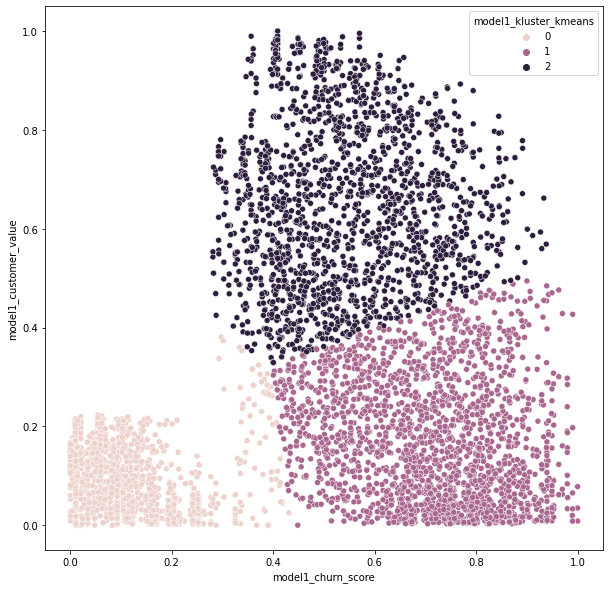

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model1_churn_score', y='model1_customer_value', hue = 'model1_kluster_kmeans')

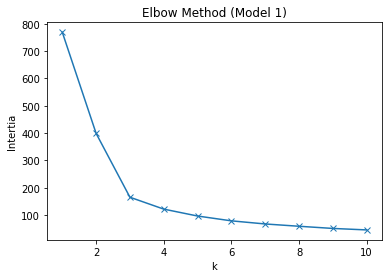

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 1)')
plt.show()

#### Model 2

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model2_customer_value'])
vmax = np.max(data1['model2_customer_value'])
cmin = np.min(data1['model2_churn_score'])
cmax = np.max(data1['model2_churn_score'])

for i in range(len(data1)):
  data1['model2_customer_value'][i] = (data1['model2_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model2_churn_score'][i] = (data1['model2_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 3
X22 = data1[["model2_churn_score","model2_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
y_km22 = {'model2_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model2_kluster_kmeans
0                      1
1                      1
2                      1
3                      1
4                      1

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model2_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     1
1  5575-GNVDE    Male  ...             0.00000                     1
2  7795-CFOCW    Male  ...             0.00000                     1
3  1452-KIOVK    Male  ...             0.26537                     1
4  6713-OKOMC  Female  ...             0.00000                     1

[5 rows x 37 columns]

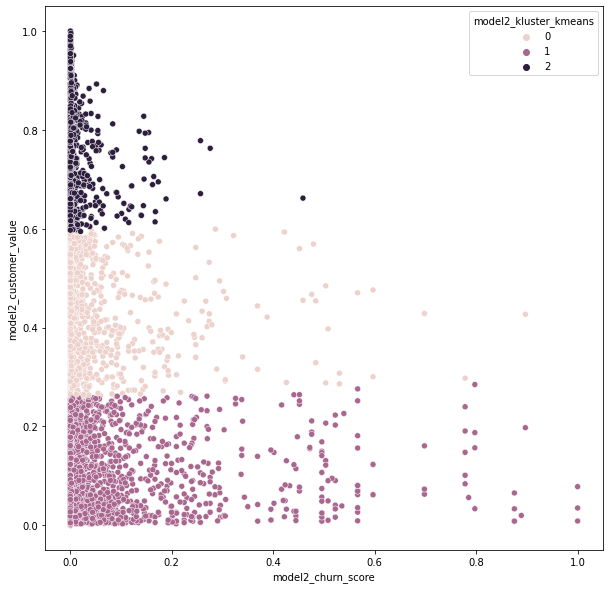

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model2_churn_score', y='model2_customer_value', hue = 'model2_kluster_kmeans')

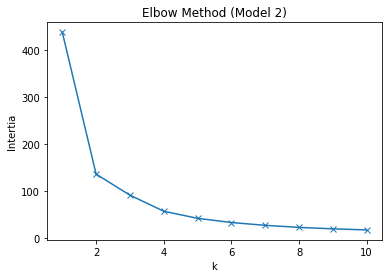

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 2)')
plt.show()

#### Model 3

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model3_customer_value'])
vmax = np.max(data1['model3_customer_value'])
cmin = np.min(data1['model3_churn_score'])
cmax = np.max(data1['model3_churn_score'])

for i in range(len(data1)):
  data1['model3_customer_value'][i] = (data1['model3_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model3_churn_score'][i] = (data1['model3_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model3_churn_score","model3_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 0, 0, ..., 2, 3, 2], dtype=int32)

In [ ]:
y_km22 = {'model3_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model3_kluster_kmeans
0                      3
1                      0
2                      0
3                      3
4                      3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model3_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     3
1  5575-GNVDE    Male  ...             0.00000                     0
2  7795-CFOCW    Male  ...             0.00000                     0
3  1452-KIOVK    Male  ...             0.26537                     3
4  6713-OKOMC  Female  ...             0.00000                     3

[5 rows x 37 columns]

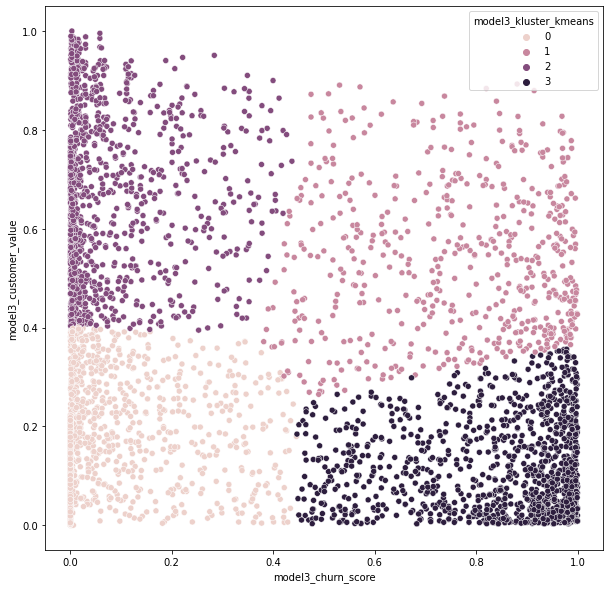

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model3_churn_score', y='model3_customer_value', hue = 'model3_kluster_kmeans')

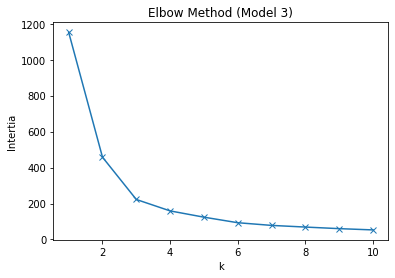

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 3)')
plt.show()

#### Model 4

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model4_customer_value'])
vmax = np.max(data1['model4_customer_value'])
cmin = np.min(data1['model4_churn_score'])
cmax = np.max(data1['model4_churn_score'])

for i in range(len(data1)):
  data1['model4_customer_value'][i] = (data1['model4_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model4_churn_score'][i] = (data1['model4_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model4_churn_score","model4_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 0, 0, ..., 2, 1, 2], dtype=int32)

In [ ]:
y_km22 = {'model4_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model4_kluster_kmeans
0                      1
1                      0
2                      0
3                      1
4                      1

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model4_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     1
1  5575-GNVDE    Male  ...             0.00000                     0
2  7795-CFOCW    Male  ...             0.00000                     0
3  1452-KIOVK    Male  ...             0.26537                     1
4  6713-OKOMC  Female  ...             0.00000                     1

[5 rows x 37 columns]

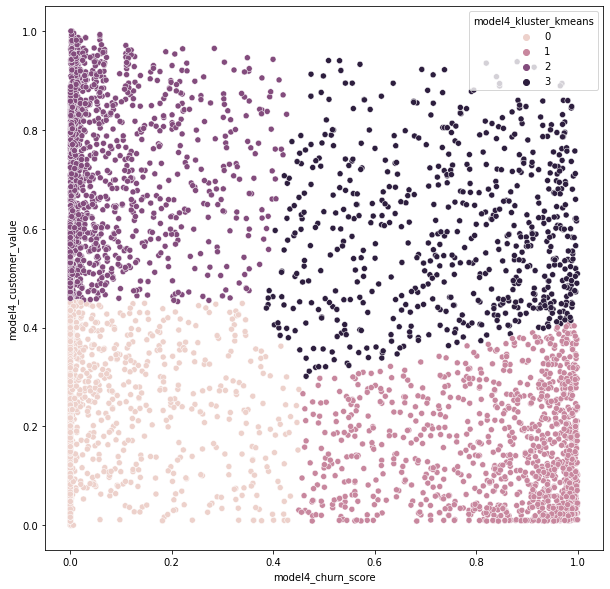

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model4_churn_score', y='model4_customer_value', hue = 'model4_kluster_kmeans')

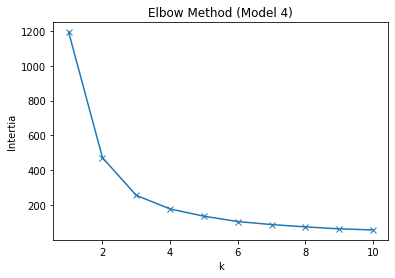

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 4)')
plt.show()

In [ ]:
# ekstrak data

for i in range(len(cluster)):
  if cluster.model4_kluster_kmeans[i] == 3:
    cluster.model4_kluster_kmeans[i] = 1
  elif cluster.model4_kluster_kmeans[i] == 0:
    cluster.model4_kluster_kmeans[i] = 3
  elif cluster.model4_kluster_kmeans[i] == 1:
    cluster.model4_kluster_kmeans[i] = 4

cluster.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


customerID  gender  ...  model8_churn_score model4_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     4
1  5575-GNVDE    Male  ...             0.00000                     3
2  7795-CFOCW    Male  ...             0.00000                     3
3  1452-KIOVK    Male  ...             0.26537                     4
4  6713-OKOMC  Female  ...             0.00000                     4

[5 rows x 37 columns]

In [ ]:
cluster.to_csv('model4_kmeans_4kluster.csv')
cluster.to_excel('model4_kmeans_4kluster.xlsx')

#### Model 5 *
Untuk sekarang yang paling baik

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model5_customer_value'])
vmax = np.max(data1['model5_customer_value'])
cmin = np.min(data1['model5_churn_score'])
cmax = np.max(data1['model5_churn_score'])

for i in range(len(data1)):
  data1['model5_customer_value'][i] = (data1['model5_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model5_churn_score'][i] = (data1['model5_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model5_churn_score","model5_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 2, 2, ..., 0, 1, 0], dtype=int32)

In [ ]:
y_km22 = {'model5_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model5_kluster_kmeans
0                      1
1                      2
2                      2
3                      1
4                      1

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model5_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     1
1  5575-GNVDE    Male  ...             0.00000                     2
2  7795-CFOCW    Male  ...             0.00000                     2
3  1452-KIOVK    Male  ...             0.26537                     1
4  6713-OKOMC  Female  ...             0.00000                     1

[5 rows x 37 columns]

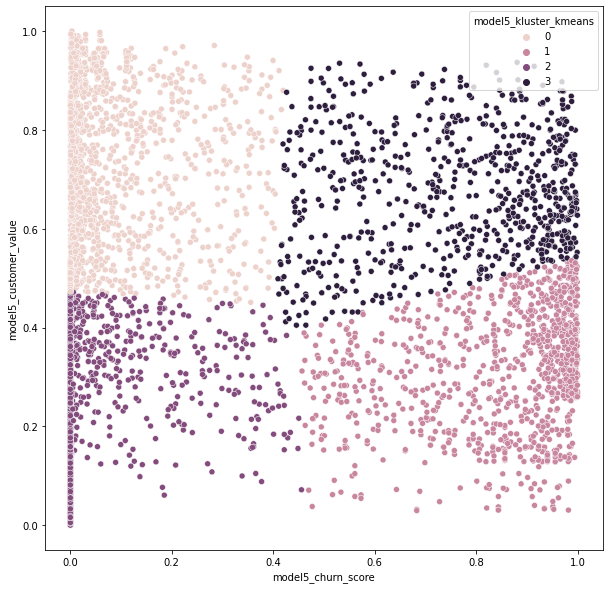

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model5_churn_score', y='model5_customer_value', hue = 'model5_kluster_kmeans')

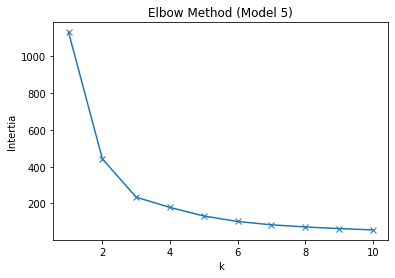

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 5)')
plt.show()

In [ ]:
# # ekstrak data

# for i in range(len(cluster)):
#   if cluster.model5_kluster_kmeans[i] == 3:
#     cluster.model5_kluster_kmeans[i] = 1
#   elif cluster.model5_kluster_kmeans[i] == 0:
#     cluster.model5_kluster_kmeans[i] = 2
#   elif cluster.model5_kluster_kmeans[i] == 2:
#     cluster.model5_kluster_kmeans[i] = 3
#   else:
#     cluster.model5_kluster_kmeans[i] = 4

# cluster.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

customerID  gender  ...  model8_churn_score model5_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     4
1  5575-GNVDE    Male  ...             0.00000                     3
2  7795-CFOCW    Male  ...             0.00000                     3
3  1452-KIOVK    Male  ...             0.26537                     4
4  6713-OKOMC  Female  ...             0.00000                     4

[5 rows x 37 columns]

In [ ]:
# cluster.to_csv('model5_kmeans_4cluster.csv')

In [ ]:
# cluster.to_excel('model5_kmeans_4cluster.xlsx')

#### Model 6 *
Untuk sekarang kedua yang paling baik

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model6_customer_value'])
vmax = np.max(data1['model6_customer_value'])
cmin = np.min(data1['model6_churn_score'])
cmax = np.max(data1['model6_churn_score'])

for i in range(len(data1)):
  data1['model6_customer_value'][i] = (data1['model6_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model6_churn_score'][i] = (data1['model6_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model6_churn_score","model6_customer_value"]]
km22 = KMeans(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 2, 2, ..., 0, 1, 0], dtype=int32)

In [ ]:
y_km22 = {'model6_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model6_kluster_kmeans
0                      1
1                      2
2                      2
3                      1
4                      3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model6_kluster_kmeans
0  7590-VHVEG  Female  ...             0.00000                     1
1  5575-GNVDE    Male  ...             0.00000                     2
2  7795-CFOCW    Male  ...             0.00000                     2
3  1452-KIOVK    Male  ...             0.26537                     1
4  6713-OKOMC  Female  ...             0.00000                     3

[5 rows x 37 columns]

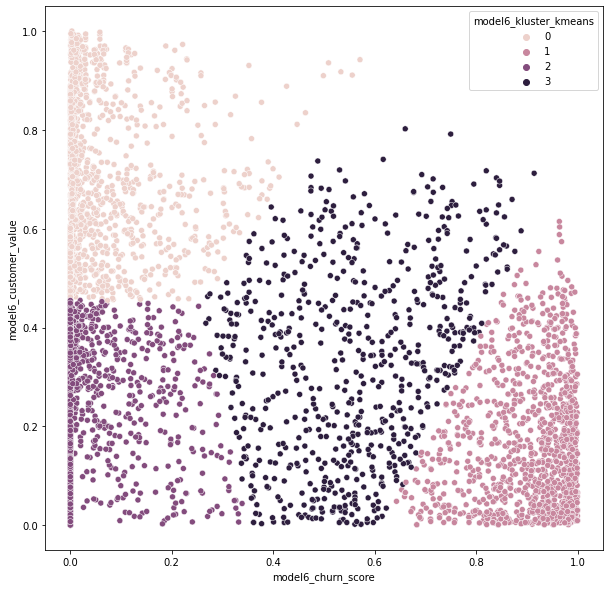

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model6_churn_score', y='model6_customer_value', hue = 'model6_kluster_kmeans')

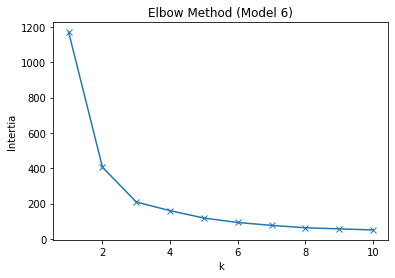

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMeans(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 6)')
plt.show()

## K-Medoids

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
# banyak_cluster = 4
X22 = model5[["model5_churn_score","model5_customer_value"]]
km22 =  KMedoids(n_clusters=4, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22 = {'model5_kluster_kmeans': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

In [ ]:
cluster = pd.concat([model5, y_km22], axis=1)
cluster.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model5_churn_score', y='model5_customer_value', hue = 'model5_kluster_kmeans')

In [ ]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed

    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)

def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided,
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)

    S = np.empty((m, k))

    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S

S = compute_d_p(datapoints, medoids_initial, 2)


def assign_labels(S):
    return np.argmin(S, axis=1)

labels = assign_labels(S)

def update_medoids(X, medoids, p):

    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)

    out_medoids = medoids

    for i in set(labels):

        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]

        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))

            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity

                out_medoids[i] = datap

    return out_medoids

def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids

    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()

        S = compute_d_p(X, medoids, p)

        labels = assign_labels(S)

        medoids = update_medoids(X, medoids, p)

        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]


### Pelanggan yang masih ada aja

#### Model 1

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model1_customer_value'])
vmax = np.max(data1['model1_customer_value'])
cmin = np.min(data1['model1_churn_score'])
cmax = np.max(data1['model1_churn_score'])

for i in range(len(data1)):
  data1['model1_customer_value'][i] = (data1['model1_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model1_churn_score'][i] = (data1['model1_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model1_churn_score","model1_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 3, 3, ..., 1, 3, 1])

In [ ]:
y_km22 = {'model1_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model1_kluster_kmedoids
0                        3
1                        3
2                        3
3                        3
4                        3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model1_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       3
1  5575-GNVDE    Male  ...             0.00000                       3
2  7795-CFOCW    Male  ...             0.00000                       3
3  1452-KIOVK    Male  ...             0.26537                       3
4  6713-OKOMC  Female  ...             0.00000                       3

[5 rows x 37 columns]

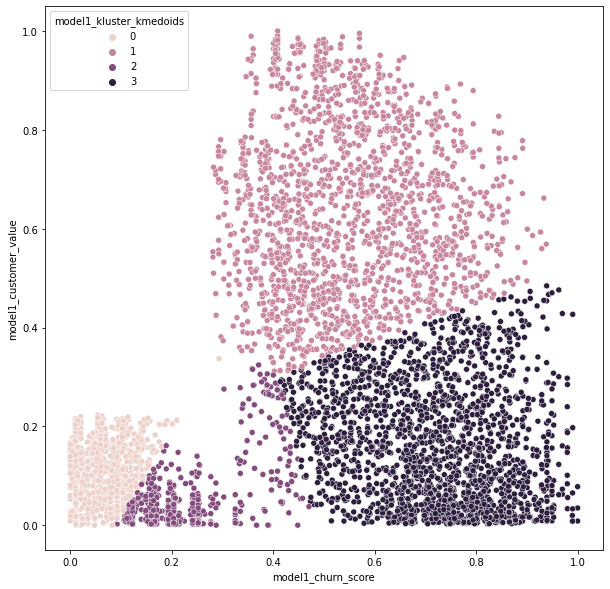

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model1_churn_score', y='model1_customer_value', hue = 'model1_kluster_kmedoids')

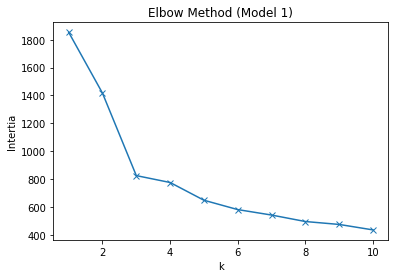

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 1)')
plt.show()

#### Model 2

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model2_customer_value'])
vmax = np.max(data1['model2_customer_value'])
cmin = np.min(data1['model2_churn_score'])
cmax = np.max(data1['model2_churn_score'])

for i in range(len(data1)):
  data1['model2_customer_value'][i] = (data1['model2_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model2_churn_score'][i] = (data1['model2_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model2_churn_score","model2_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 3, 3, ..., 1, 3, 1])

In [ ]:
y_km22 = {'model2_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model2_kluster_kmedoids
0                        3
1                        3
2                        3
3                        0
4                        3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model2_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       3
1  5575-GNVDE    Male  ...             0.00000                       3
2  7795-CFOCW    Male  ...             0.00000                       3
3  1452-KIOVK    Male  ...             0.26537                       0
4  6713-OKOMC  Female  ...             0.00000                       3

[5 rows x 37 columns]

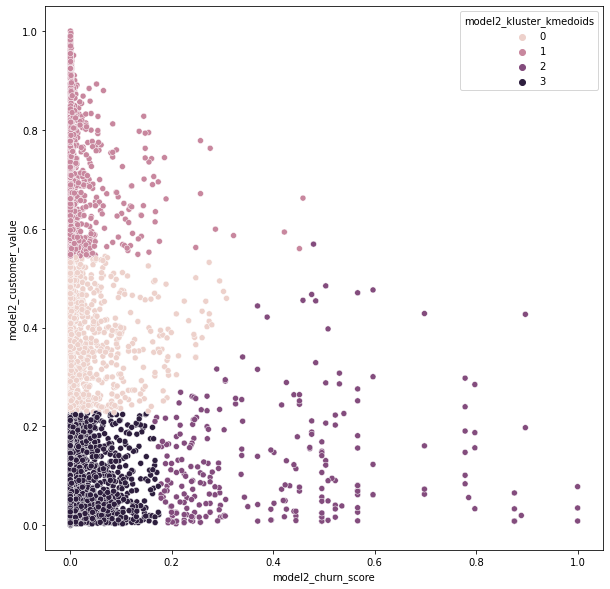

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model2_churn_score', y='model2_customer_value', hue = 'model2_kluster_kmedoids')

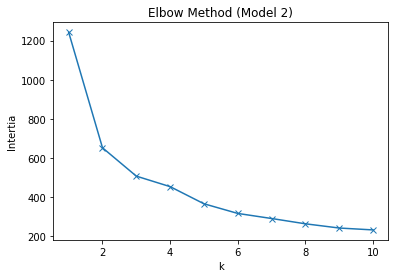

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 2)')
plt.show()

#### Model 3

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model3_customer_value'])
vmax = np.max(data1['model3_customer_value'])
cmin = np.min(data1['model3_churn_score'])
cmax = np.max(data1['model3_churn_score'])

for i in range(len(data1)):
  data1['model3_customer_value'][i] = (data1['model3_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model3_churn_score'][i] = (data1['model3_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 3
X22 = data1[["model3_churn_score","model3_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([1, 2, 2, ..., 0, 1, 0])

In [ ]:
y_km22 = {'model3_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model3_kluster_kmedoids
0                        1
1                        2
2                        2
3                        1
4                        1

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model3_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       1
1  5575-GNVDE    Male  ...             0.00000                       2
2  7795-CFOCW    Male  ...             0.00000                       2
3  1452-KIOVK    Male  ...             0.26537                       1
4  6713-OKOMC  Female  ...             0.00000                       1

[5 rows x 37 columns]

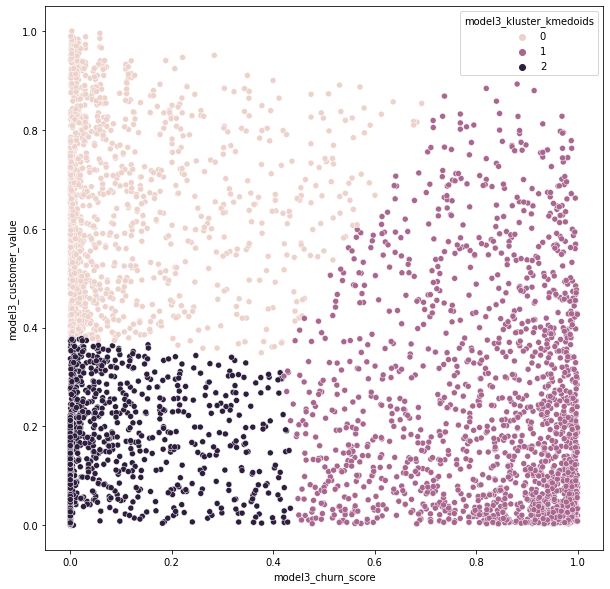

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model3_churn_score', y='model3_customer_value', hue = 'model3_kluster_kmedoids')

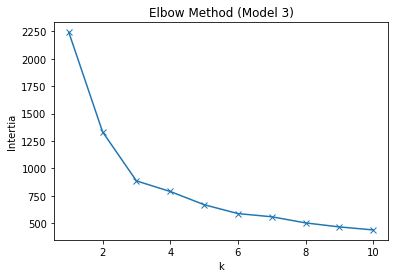

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 3)')
plt.show()

#### Model 4

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model4_customer_value'])
vmax = np.max(data1['model4_customer_value'])
cmin = np.min(data1['model4_churn_score'])
cmax = np.max(data1['model4_churn_score'])

for i in range(len(data1)):
  data1['model4_customer_value'][i] = (data1['model4_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model4_churn_score'][i] = (data1['model4_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model4_churn_score","model4_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 1, 1, ..., 2, 3, 2])

In [ ]:
y_km22 = {'model4_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model4_kluster_kmedoids
0                        3
1                        1
2                        1
3                        3
4                        3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model4_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       3
1  5575-GNVDE    Male  ...             0.00000                       1
2  7795-CFOCW    Male  ...             0.00000                       1
3  1452-KIOVK    Male  ...             0.26537                       3
4  6713-OKOMC  Female  ...             0.00000                       3

[5 rows x 37 columns]

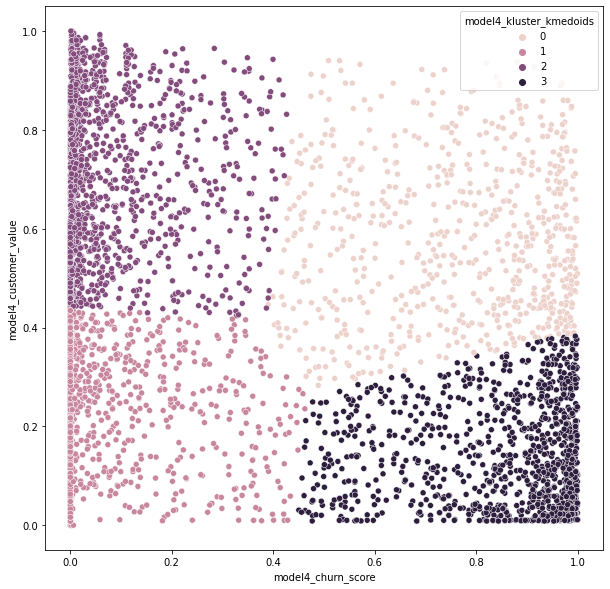

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model4_churn_score', y='model4_customer_value', hue = 'model4_kluster_kmedoids')

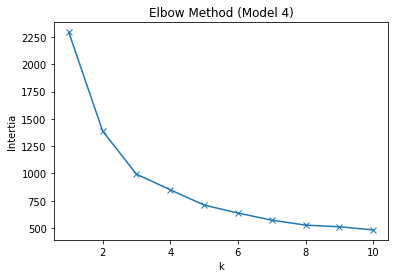

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 4)')
plt.show()

#### Model 5 *
Untuk sekarang yang paling baik

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model5_customer_value'])
vmax = np.max(data1['model5_customer_value'])
cmin = np.min(data1['model5_churn_score'])
cmax = np.max(data1['model5_churn_score'])

for i in range(len(data1)):
  data1['model5_customer_value'][i] = (data1['model5_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model5_churn_score'][i] = (data1['model5_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 3
X22 = data1[["model5_churn_score","model5_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([2, 1, 1, ..., 0, 2, 0])

In [ ]:
y_km22 = {'model5_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model5_kluster_kmedoids
0                        2
1                        1
2                        1
3                        2
4                        2

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model5_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       2
1  5575-GNVDE    Male  ...             0.00000                       1
2  7795-CFOCW    Male  ...             0.00000                       1
3  1452-KIOVK    Male  ...             0.26537                       2
4  6713-OKOMC  Female  ...             0.00000                       2

[5 rows x 37 columns]

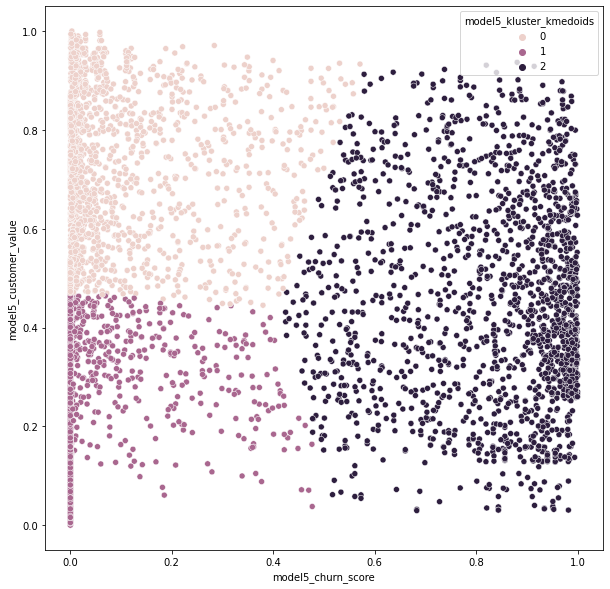

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model5_churn_score', y='model5_customer_value', hue = 'model5_kluster_kmedoids')

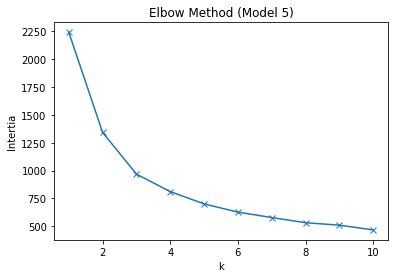

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 5)')
plt.show()

#### Model 6 *
Untuk sekarang kedua yang paling baik

In [ ]:
data1 = pd.read_csv('data1.csv')

In [ ]:
data1.head(2)

customerID  gender  ...  model8_customer_value model8_churn_score
0  7590-VHVEG  Female  ...               0.008663                0.0
1  5575-GNVDE    Male  ...               0.344893                0.0

[2 rows x 36 columns]

In [ ]:
vmin = np.min(data1['model6_customer_value'])
vmax = np.max(data1['model6_customer_value'])
cmin = np.min(data1['model6_churn_score'])
cmax = np.max(data1['model6_churn_score'])

for i in range(len(data1)):
  data1['model6_customer_value'][i] = (data1['model6_customer_value'][i] - vmin)/(vmax - vmin)
  data1['model6_churn_score'][i] = (data1['model6_churn_score'][i] - cmin)/(cmax - cmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
banyak_cluster = 4
X22 = data1[["model6_churn_score","model6_customer_value"]]
km22 = KMedoids(n_clusters=banyak_cluster, random_state=0).fit(X22)
y_km22 = km22.predict(X22) #hasil prediksi, berupa 7043 nilai untuk banya_kluster kluster

In [ ]:
y_km22

array([3, 2, 2, ..., 0, 3, 0])

In [ ]:
y_km22 = {'model6_kluster_kmedoids': [y_km22[i] for i in range(len(y_km22))]}
y_km22 = pd.DataFrame(data=y_km22)
y_km22.head()

model6_kluster_kmedoids
0                        3
1                        2
2                        2
3                        3
4                        3

In [ ]:
cluster = pd.concat([data1, y_km22], axis=1)
cluster.head()

customerID  gender  ...  model8_churn_score model6_kluster_kmedoids
0  7590-VHVEG  Female  ...             0.00000                       3
1  5575-GNVDE    Male  ...             0.00000                       2
2  7795-CFOCW    Male  ...             0.00000                       2
3  1452-KIOVK    Male  ...             0.26537                       3
4  6713-OKOMC  Female  ...             0.00000                       3

[5 rows x 37 columns]

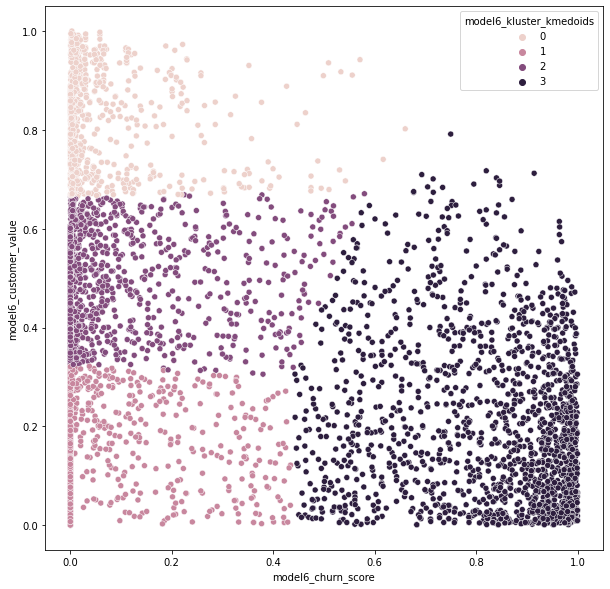

In [ ]:
#plot untuk 4 kluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=cluster, x = 'model6_churn_score', y='model6_customer_value', hue = 'model6_kluster_kmedoids')

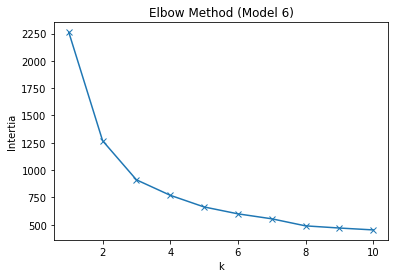

In [ ]:
intertia1 =[]
K1 = range (1,11)
for k in K1:
  km11 = KMedoids(n_clusters=k)
  km11 = km11.fit(X22)
  intertia1.append(km11.inertia_)

plt.plot(K1, intertia1, marker="x")
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Elbow Method (Model 6)')
plt.show()

# Analisis Data Setelah Diekstrak

## Model 5

In [ ]:
ekstrak = pd.read_csv('model5_kmeans_4cluster.csv')
ekstrak.head()

Unnamed: 0  customerID  ... model8_churn_score  model5_kluster_kmeans
0           0  7590-VHVEG  ...            0.00000                      4
1           1  5575-GNVDE  ...            0.00000                      3
2           2  7795-CFOCW  ...            0.00000                      3
3           3  1452-KIOVK  ...            0.26537                      4
4           4  6713-OKOMC  ...            0.00000                      4

[5 rows x 38 columns]

In [ ]:
# statistika deskriptif variabel numerik model5
# statistika deskriptif tenure
print(ekstrak['tenure'].describe())

# statistika deskriptif MonthlyCharges
print(ekstrak['MonthlyCharges'].describe())

# statistika deskriptif TotalCharges
print(ekstrak['TotalCharges'].describe())

NameError: ignored

In [ ]:
# statistika deskriptif MonthlyCharges
for i in range(1, 5):
  print('''
  kuadran {} :
{}
  '''.format(i, ekstrak[ekstrak['model5_kluster_kmeans'] == i]['MonthlyCharges'].describe()))

In [ ]:
# statistika deskriptif TotalCharges
for i in range(1, 5):
  print('''
  kuadran {} :
{}
  '''.format(i, ekstrak[ekstrak['model5_kluster_kmeans'] == i]['TotalCharges'].describe()))

In [ ]:
# statistika deskriptif tenure
for i in range(1, 5):
  print('''
  kuadran {} :
{}
  '''.format(i, ekstrak[ekstrak['model5_kluster_kmeans'] == i]['tenure'].describe()))

In [ ]:
# boxplot tenure
sns.boxplot(x='model5_kluster_kmeans', y='tenure', data=ekstrak)
plt.figure()

# boxplot MonthlyCharges
sns.boxplot(x='model5_kluster_kmeans', y='MonthlyCharges', data=ekstrak)
plt.figure()

# boxplot TotalCharges
sns.boxplot(x='model5_kluster_kmeans', y='TotalCharges', data=ekstrak)

### Kuadran 4

In [ ]:
k4 = ekstrak[ekstrak['model5_kluster_kmeans'] == 4]
k4.reset_index(drop=True, inplace=True)
k4.head()

Unnamed: 0  customerID  ... model8_churn_score  model5_kluster_kmeans
0           0  7590-VHVEG  ...            0.00000                      4
1           3  1452-KIOVK  ...            0.26537                      4
2           4  6713-OKOMC  ...            0.00000                      4
3          13  4183-MYFRB  ...            0.26537                      4
4          17  6865-JZNKO  ...            0.00000                      4

[5 rows x 38 columns]

In [ ]:
# banyak data di kuadran 4
print('Banyak data : {}, persentase dari data model 5 adalah {} %'.format(len(k4), 100*len(k4)/len(ekstrak)))

Sekitar 1/5 keseluruhan data ada di kuadran 4

In [ ]:
# bikin variabel baru:
# gte_tenure_mean (lebih besar/sama dengan mean dari tenure)
tenure_mean = np.mean(k4.tenure)
gte_tenure_mean = [1 if k4.tenure[i] >= tenure_mean else 0 for i in range(len(k4))]

# gte_MonthlyCharges_mean (lebih besar/sama dengan mean dari MonthlyCharges)
MonthlyCharges_mean = np.mean(k4.MonthlyCharges)
gte_MonthlyCharges_mean = [1 if k4.MonthlyCharges[i] >= MonthlyCharges_mean else 0 for i in range(len(k4))]

# gte_TotalCharges_mean (lebih besar/sama dengan mean dari TotalCharges)
TotalCharges_mean = np.mean(k4.TotalCharges)
gte_TotalCharges_mean = [1 if k4.TotalCharges[i] >= TotalCharges_mean else 0 for i in range(len(k4))]

In [ ]:
# bikin DataFrame baru isinya 3 variabel baru tadi
numvar_mean = {'gte_tenure_mean' : gte_tenure_mean,
               'gte_MonthlyCharges_mean' : gte_MonthlyCharges_mean,
               'gte_TotalCharges_mean' : gte_TotalCharges_mean}

numvar_mean = pd.DataFrame(data=numvar_mean)
numvar_mean.head()

In [ ]:
# gabungin DataFrame baru ke k4
k4 = pd.concat([k4, numvar_mean], axis=1)
k4.head()

In [ ]:
# drop kolom yang ga perlu buat diplot, masukin ke variabel k4_columns
k4_columns = k4.columns.drop(['Unnamed: 0', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges',
                 'model1_customer_value', 'model1_churn_score',
       'model2_customer_value', 'model2_churn_score', 'model3_customer_value',
       'model3_churn_score', 'model3_customer_value_normalize',
       'model4_customer_value', 'model4_churn_score', 'model5_customer_value',
       'model5_churn_score', 'model6_customer_value', 'model6_churn_score',
       'model8_customer_value', 'model8_churn_score', 'model5_kluster_kmeans', 'Churn'])

k4_columns

In [ ]:
# histogram masing2 kolom di k4_columns
for col in k4_columns:
  sns.histplot(x=col, data=k4)
  plt.figure()

# sns.histplot(x='Contract', data=k4)

Catatan: \
- Di kuadran 4 **semua** pelanggan memakai layanan internet
- Di kuadran 4 **tidak ada** pelanggan dengan kontrak 2 tahunan



In [ ]:
# perbandingan gender
print('Persentase pelanggan laki2 : {} %'.format(100*len(k4[k4['gender'] == 'Male'])/len(k4)))

# perbandingan SeniorCitizen:
print('Persentase pelanggan yang senior : {} %'.format(100*len(k4[k4['SeniorCitizen'] == 1])/len(k4)))

# perbandingan Partner:
print('Persentase pelanggan yang memiliki partner : {} %'.format(100*len(k4[k4['Partner'] == 'Yes'])/len(k4)))

# perbandingan Dependents:
print('Persentase pelanggan yang memiliki tanggungan : {} %'.format(100*len(k4[k4['Dependents'] == 'Yes'])/len(k4)))

# perbandingan PhoneService:
print('Persentase pelanggan yang berlangganan layanan telepon : {} %'.format(100*len(k4[k4['PhoneService'] == 'Yes'])/len(k4)))

# perbandingan MultipleLines:
print('Persentase pelanggan yang berlangganan layanan telepon MultipleLines : {} %'.format(100*len(k4[k4['MultipleLines'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan telepon MultipleLines : {} %'.format(100*len(k4[k4['MultipleLines'] == 'No'])/len(k4)))

# perbandingan InternetService:
print('Persentase pelanggan yang berlangganan layanan internet DSL : {} %'.format(100*len(k4[k4['InternetService'] == 'DSL'])/len(k4)))

# perbandingan OnlineSecurity:
print('Persentase pelanggan yang berlangganan layanan internet tambahan OnlineSecurity : {} %'.format(100*len(k4[k4['OnlineSecurity'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan OnlineSecurity : {} %'.format(100*len(k4[k4['OnlineSecurity'] == 'No'])/len(k4)))

# perbandingan OnlineBackup:
print('Persentase pelanggan yang berlangganan layanan internet tambahan OnlineBackup : {} %'.format(100*len(k4[k4['OnlineBackup'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan OnlineBackup : {} %'.format(100*len(k4[k4['OnlineBackup'] == 'No'])/len(k4)))

# perbandingan DeviceProtection:
print('Persentase pelanggan yang berlangganan layanan internet tambahan DeviceProtection : {} %'.format(100*len(k4[k4['DeviceProtection'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan DeviceProtection : {} %'.format(100*len(k4[k4['DeviceProtection'] == 'No'])/len(k4)))

# perbandingan TechSupport:
print('Persentase pelanggan yang berlangganan layanan internet tambahan TechSupport : {} %'.format(100*len(k4[k4['TechSupport'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan TechSupport : {} %'.format(100*len(k4[k4['TechSupport'] == 'No'])/len(k4)))

# perbandingan StreamingTV:
print('Persentase pelanggan yang berlangganan layanan internet tambahan StreamingTV : {} %'.format(100*len(k4[k4['StreamingTV'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan StreamingTV : {} %'.format(100*len(k4[k4['StreamingTV'] == 'No'])/len(k4)))

# perbandingan StreamingMovies:
print('Persentase pelanggan yang berlangganan layanan internet tambahan StreamingMovies : {} %'.format(100*len(k4[k4['StreamingMovies'] == 'Yes'])/len(k4)))
print('Persentase pelanggan yang tidak berlangganan layanan internet tambahan StreamingMovies : {} %'.format(100*len(k4[k4['StreamingMovies'] == 'No'])/len(k4)))

# perbandingan Contract:
print('Persentase pelanggan yang kontrak berlangganannya bulanan  : {} %'.format(100*len(k4[k4['Contract'] == 'Month-to-month'])/len(k4)))

# perbandingan PaperlessBilling:
print('Persentase pelanggan yang tagihannya paperless  : {} %'.format(100*len(k4[k4['PaperlessBilling'] == 'Yes'])/len(k4)))

# perbandingan PaymentMethod:
print('Persentase pelanggan dengan metode pembayaran Electronic check  : {} %'.format(100*len(k4[k4['PaymentMethod'] == 'Electronic check'])/len(k4)))
print('Persentase pelanggan dengan metode pembayaran Mailed check  : {} %'.format(100*len(k4[k4['PaymentMethod'] == 'Mailed check'])/len(k4)))
print('Persentase pelanggan dengan metode pembayaran Bank transfer (automatic)  : {} %'.format(100*len(k4[k4['PaymentMethod'] == 'Bank transfer (automatic)'])/len(k4)))
print('Persentase pelanggan dengan metode pembayaran Credit card (automatic)  : {} %'.format(100*len(k4[k4['PaymentMethod'] == 'Credit card (automatic)'])/len(k4)))

Persentase pelanggan laki2 : 51.0879848628193 %
Persentase pelanggan yang senior : 18.448438978240304 %
Persentase pelanggan yang memiliki partner : 27.05771050141911 %
Persentase pelanggan yang memiliki tanggungan : 15.042573320719017 %
Persentase pelanggan yang berlangganan layanan telepon : 84.48438978240303 %
Persentase pelanggan yang berlangganan layanan telepon MultipleLines : 27.246925260170293 %
Persentase pelanggan yang tidak berlangganan layanan telepon MultipleLines : 57.237464522232735 %
Persentase pelanggan yang berlangganan layanan internet DSL : 54.77767265846736 %
Persentase pelanggan yang berlangganan layanan internet tambahan OnlineSecurity : 16.272469252601702 %
Persentase pelanggan yang tidak berlangganan layanan internet tambahan OnlineSecurity : 83.72753074739829 %
Persentase pelanggan yang berlangganan layanan internet tambahan OnlineBackup : 23.462630085146643 %
Persentase pelanggan yang tidak berlangganan layanan internet tambahan OnlineBackup : 76.537369914853

In [ ]:
k4_mean = np.mean(k4.tenure)
k4[k4['tenure'] >= k4_mean]


In [ ]:
ekstrak = pd.read_csv('model5_kmeans_4cluster.csv')
ekstrak.head()

Unnamed: 0  customerID  ... model8_churn_score  model5_kluster_kmeans
0           0  7590-VHVEG  ...            0.00000                      4
1           1  5575-GNVDE  ...            0.00000                      3
2           2  7795-CFOCW  ...            0.00000                      3
3           3  1452-KIOVK  ...            0.26537                      4
4           4  6713-OKOMC  ...            0.00000                      4

[5 rows x 38 columns]

In [ ]:
def bonus():
